# Big cities music 🎸

**Table of contents**<a id='toc0_'></a>    
1. [Data exploration](#toc1_)    
2. [Data preprocessing](#toc2_)    
2.1. [Bad style in column names](#toc2_1_)    
2.2. [Handle missing values](#toc2_2_)    
2.3. [Handle with explicit duplicates](#toc2_3_)    
2.4. [Handle with implicit duplicates](#toc2_4_)    
3. [Research](#toc3_)    
3.1. [Difference between days of week](#toc3_1_)    
3.2. [Difference between cities at Monday morning and Friday evening](#toc3_2_)    
3.3. [Different genres in Moscow and St. Petersburg](#toc3_3_)    
4. [Research results](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**The purpose of the research** — test three hypotheses:
1. User activity depends on the day of the week. Moreover, this manifests itself in different ways in Moscow and St. Petersburg.
2. On Monday morning, some genres prevail in Moscow, and others in St. Petersburg. Similarly, on Friday evenings, different genres prevail, depending on the city.
3. Moscow and St. Petersburg prefer different genres of music. In Moscow, pop music is more often listened to, in St. Petersburg - Russian rap.

## 1. <a id='toc1_'></a>[Data exploration](#toc0_)

In [1]:
import pandas as pd
import seaborn as sns
import os
import sys

import warnings
warnings.filterwarnings('ignore')

current_dir = os.path.abspath('')
utils_path = os.path.join(current_dir, '..', 'utils')
sys.path.append(utils_path)
from utils import Utils

In [2]:
# dataset not presented in the repository due to copyright
df = pd.read_csv('./data/yandex_music_project.csv')

In [3]:
df.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


## 2. <a id='toc2_'></a>[Data preprocessing](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Bad style in column names](#toc0_)

In [5]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [6]:
df = df.rename(columns={
    '  userID': 'user_id',
    'Track': 'track',
    '  City  ': 'city',
    'Day': 'day'
})

In [7]:
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### 2.2. <a id='toc2_2_'></a>[Handle missing values](#toc0_)

In [8]:
Utils.print_table_about_nans([df], ['DataFrame'])

+---------+-----------------------------+
| Feature | DataFrame missing count (%) |
+---------+-----------------------------+
|   time  |           0 (0.0%)          |
|  artist |         7203 (11.1%)        |
| user_id |           0 (0.0%)          |
|  track  |         1231 (1.9%)         |
|   city  |           0 (0.0%)          |
|  genre  |         1198 (1.8%)         |
|   day   |           0 (0.0%)          |
+---------+-----------------------------+


In [9]:
df = df.fillna('unknown')

In [10]:
Utils.print_table_about_nans([df], ['DataFrame'])

+---------+-----------------------------+
| Feature | DataFrame missing count (%) |
+---------+-----------------------------+
|   time  |           0 (0.0%)          |
|  artist |           0 (0.0%)          |
| user_id |           0 (0.0%)          |
|  track  |           0 (0.0%)          |
|   city  |           0 (0.0%)          |
|  genre  |           0 (0.0%)          |
|   day   |           0 (0.0%)          |
+---------+-----------------------------+


### 2.3. <a id='toc2_3_'></a>[Handle with explicit duplicates](#toc0_)

In [11]:
df.duplicated().sum()

3826

In [12]:
df = df.drop_duplicates().reset_index(drop=True)

In [13]:
df.duplicated().sum()

0

### 2.4. <a id='toc2_4_'></a>[Handle with implicit duplicates](#toc0_)

In [14]:
sorted(df['genre'].unique())

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'alternativepunk',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'author',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'chanson',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',


In [15]:
df['genre'] = df['genre'].replace(['hip', 'hop', 'hip-hop'], 'hiphop')
df['genre'] = df['genre'].replace({'электроника': 'electronic'})

In [16]:
sorted(df['genre'].unique())

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'alternativepunk',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'author',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'chanson',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',


## 3. <a id='toc3_'></a>[Research](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Difference between days of week](#toc0_)

In [17]:
df['city'].value_counts()

city
Moscow              42741
Saint-Petersburg    18512
Name: count, dtype: int64

In [18]:
df['day'].value_counts()

day
Friday       21840
Monday       21354
Wednesday    18059
Name: count, dtype: int64

In [19]:
def number_tracks(day: str, city: str) -> int:
    return len(df.query('day == @day and city == @city'))

In [20]:
columns = ['monday', 'wednesday', 'friday']

listening_info = pd.DataFrame(data=[
    [
        number_tracks('Monday', 'Moscow'),
        number_tracks('Wednesday', 'Moscow'),
        number_tracks('Friday', 'Moscow')
    ],
    [
        number_tracks('Monday', 'Saint-Petersburg'), 
        number_tracks('Wednesday', 'Saint-Petersburg'), 
        number_tracks('Friday', 'Saint-Petersburg')
    ]
], columns=columns, index=['Moscow', 'Saint-Petersburg'])

listening_info

,monday,wednesday,friday
Moscow,15740,11056,15945
Saint-Petersburg,5614,7003,5895


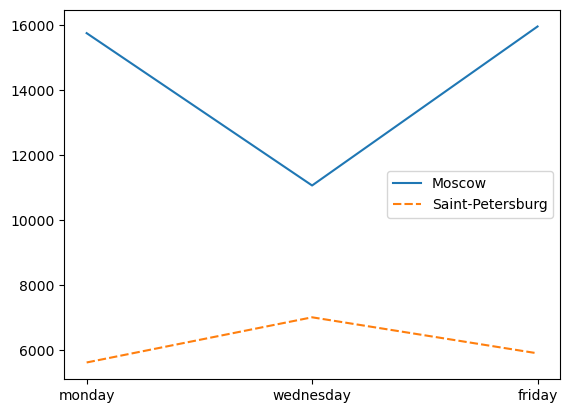

In [21]:
sns.lineplot(listening_info.T);

**Conclusions**

The data shows the difference in user behavior:

- In Moscow, the peak of listening falls on Monday and Friday, and on Wednesday there is a noticeable decline.
- In St. Petersburg, on the contrary, they listen to music more on Wednesdays. Activity on Monday and Friday is almost equally inferior to Wednesday here.

So, the data speak in favor of the first hypothesis.

### 3.2. <a id='toc3_2_'></a>[Difference between cities at Monday morning and Friday evening](#toc0_)

According to the second hypothesis, some genres prevail in Moscow on Monday morning, and others in St. Petersburg. Similarly, on Friday evenings, different genres prevail, depending on the city.

In [22]:
moscow_general = df[df['city'] == 'Moscow']
spb_general = df[df['city'] == 'Saint-Petersburg']

In [23]:
def genre_weekday(df: pd.DataFrame,
                  day: str,
                  time1: str,
                  time2: str
                  ) -> pd.Series:
    
    genre_df = df.query('day == @day and time < @time2 and time > @time1')
    return genre_df['genre'].value_counts()[:10]

In [24]:
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: count, dtype: int64

In [25]:
genre_weekday(spb_general, 'Monday', '07:00', '11:00')

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: count, dtype: int64

In [26]:
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: count, dtype: int64

In [27]:
genre_weekday(spb_general, 'Friday', '17:00', '23:00')

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: count, dtype: int64

**Conclusions**

If we compare the top 10 genres on Monday morning, we can draw the following conclusions:

1. In Moscow and St. Petersburg, they listen to similar music. The only difference is that the Moscow rating includes the “world” genre, while the St. Petersburg rating includes jazz and classical.

2. In Moscow, there were so many missing values that the value `unknown` took the tenth place among the most popular genres. This means that the missing values occupy a significant share in the data and threaten the reliability of the study.

Friday evening does not change this picture. Some genres rise a little higher, others go down, but overall the top 10 remains the same.

Thus, the second hypothesis was only partially confirmed:
* Users listen to similar music at the beginning of the week and at the end.
* The difference between Moscow and St. Petersburg is not too big. In Moscow, Russian popular music is more often listened to, in St. Petersburg — jazz.

However, omissions in the data cast doubt on this result. There are so many of them in Moscow that the top 10 ranking might have looked different if it hadn't been for the lost genre data.

### 3.3. <a id='toc3_3_'></a>[Different genres in Moscow and St. Petersburg](#toc0_)

**Hypothesis**: St. Petersburg is the capital of rap, music of this genre is listened to there more often than in Moscow.  And Moscow is a city of contrasts, which, nevertheless, is dominated by pop music.

In [28]:
moscow_general['genre'].value_counts()[:10]

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: count, dtype: int64

In [29]:
spb_general['genre'].value_counts()[:10]

genre
pop            2431
dance          1932
rock           1879
electronic     1737
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: count, dtype: int64

**Conclusions:**

The hypothesis was partially confirmed:
* Pop music is the most popular genre in Moscow, as the hypothesis suggested. Moreover, a similar genre is found in the top 10 genres - Russian popular music.
* Contrary to expectations, rap is equally popular in Moscow and St. Petersburg.


## 4. <a id='toc4_'></a>[Research results](#toc0_)

We have tested three hypotheses and established:

1. The day of the week has different effects on user activity in Moscow and St. Petersburg.

The first hypothesis was fully confirmed.

2. Musical preferences don't change much during the week — whether it's Moscow or St. Petersburg. Small differences are noticeable at the beginning of the week, on Mondays:
* in Moscow, they listen to music of the “world” genre,
* jazz and classical music in St. Petersburg.

Thus, the second hypothesis was only partially confirmed. This result could have been different if it hadn't been for the omissions in the data.

3. There are more similarities than differences in the tastes of users in Moscow and St. Petersburg. Contrary to expectations, genre preferences in St. Petersburg resemble those in Moscow.

The third hypothesis was not confirmed. If there are differences in preferences, they are invisible to the majority of users.